# Exploratory Data Analysis (EDA) - zadania

Przeanalizuj zbiór danych `houses.csv`, który zawiera informacje o cenach mieszkań wystawionych na sprzedaż. Wykonaj poniższe zadania, których wynikiem będą przykładowe informacje jakie możemy pozyskać w trakcie eksploracyjnej analizy danych.

Zadania 1-5: 30 minut

Zadania 6-9: 30 minut

Zadania 10-12 20 minut

Zadania 13-14: 15 minut

1. Zaimportuj `pandas`  i wczytaj zbiór danych. Wyświetl pierwszych 5 wierszy i zobacz co znajduje się w danych. Usuń kolumny `address` oraz `id`

In [2]:
import pandas as pd
df = pd.read_csv("data/houses.csv")

In [4]:
df.head()

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [288]:
df.drop(["address", "id"], axis = 1, inplace = True)

In [6]:
df

,city,floor,latitude,longitude,price,rooms,sq,year
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Poznań,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...
23759,Poznań,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,Warszawa,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,Poznań,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,Kraków,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


2. Wypisz ile brakujących wartości jest w każdej kolumnie zbioru danych. Użyj do tego pętli `for`

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Napisz pętlę for po wszystkich kolumnach. Dla każdej kolumny wyciągnij ją z df-a i wykonaj funkcje .isna() oraz .sum()
</details>


In [9]:
for colname, col in df.iteritems():
    print(col.isna().sum())

0
0
0
0
0
0
0
0


3. Sprawdź unikalne wartości oraz ich liczebność dla zmiennych kategorycznych. Dla zmiennych liczbowych narysuj histogramy przedstawiające rozkład wartości zmiennej. Zastosuj jedynie podstawowe formatowanie wykresów (wielkość, tytuł)

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Kolumny (zmienne) kategoryczne oraz - osobno - numeryczne wyciągnij za pomocą funkcji .select_dtypes(). Dla zmiennych kategorycznych wywołaj funcję .value_counts() a dla numerycznych w pętli for utwórz histogramy wartości w kolejnych kolumnach
</details>


In [12]:
df.dtypes

city          object
floor        float64
latitude     float64
longitude    float64
price        float64
rooms        float64
sq           float64
year         float64
dtype: object

In [15]:
df.select_dtypes("object").value_counts()

city    
Warszawa    9851
Kraków      9764
Poznań      4149
dtype: int64

In [ ]:
df.select_dtypes("float64")

,floor,latitude,longitude,price,rooms,sq,year
0,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...
23759,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [84]:
import matplotlib.pyplot as plt
import numpy as np

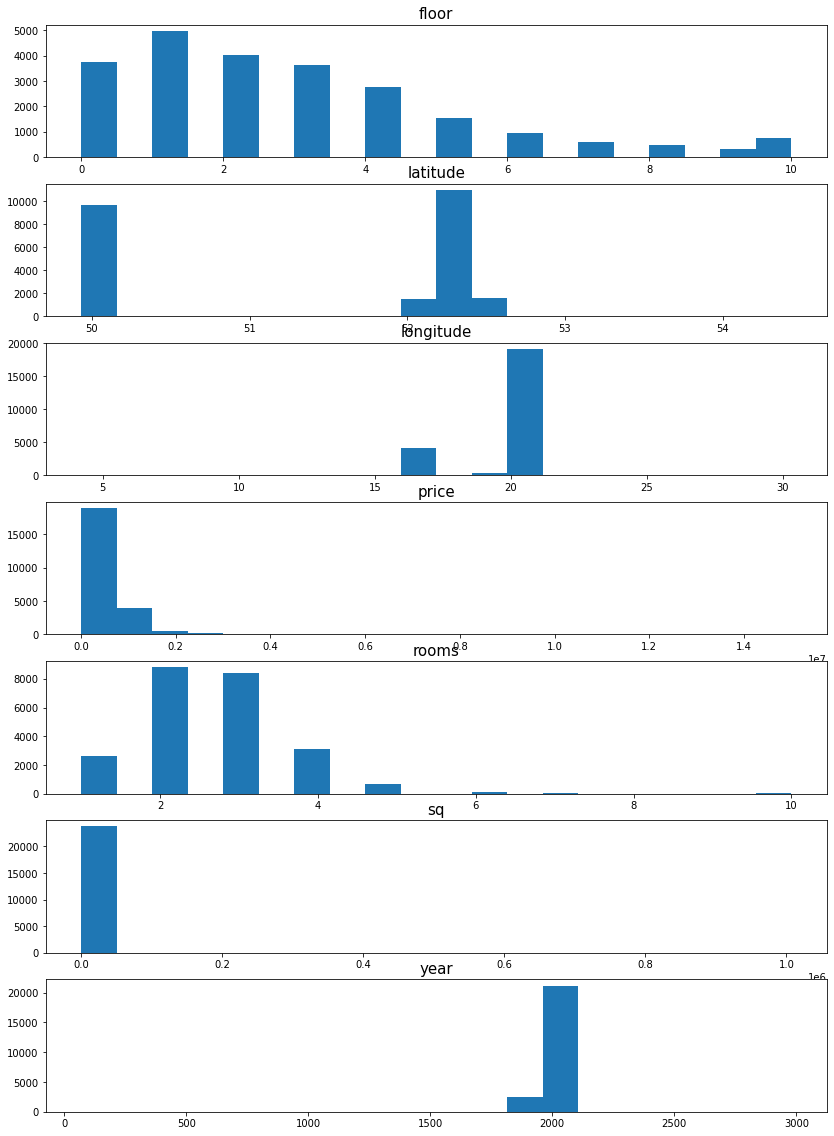

In [235]:
fig, axes = plt.subplots(figsize=(14, 20), nrows=df_num.shape[1], ncols=1)

i = 0

for colname, col in df_num.iteritems():
    axes[i].hist(col, bins = 20)
    axes[i].set_title(colname, fontsize=15)
    
    i += 1

4. Sprawdź ile jest ofert w poszczególnych miastach. Zwizualizuj to na odpowiednim wykresie

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Wywołaj .value_counts() na kolumnie 'city'. Przypisz wynik do zmiennej i wyciągnij z niej informacje na temat nazw miast oraz częstości występowania. Otrzymane listy przedstaw na barplocie
</details>


In [102]:
vc = df['city'].value_counts()

In [107]:
list(vc.index)

['Warszawa', 'Kraków', 'Poznań']

In [109]:
x_list = list(vc.index)
y_list = list(vc)

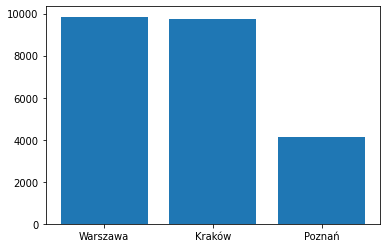

In [112]:
plt.bar(x=x_list, height=y_list)
plt.show()

5. Policz średnią powierzchnię mieszkań. Następnie zrób to samo w zależności od miasta i utwórz data frame, który zestawi te informacje

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Aby policzyć średnią powierzchnię dla danego miasta przeiteruj po unikalnych miastach i utwórz sub data frame dla każdego z nich. Następnie w ramach niego policz średnią powierzchnię i zapisz, np. do listy (append) albo po prostu wypisz.
</details>


In [118]:
df['sq'].mean()

102.7249103686248

In [234]:
df.groupby('city')[['sq']].mean().reset_index()

,city,sq
0,Kraków,160.720631
1,Poznań,61.263203
2,Warszawa,62.704040


6. Sprawdź czy istnieje zależność między rokiem budowy a powierzchnią mieszkań. Narysuj odpowiedni wykres.

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Wydziel z df-a takie wiersze, żeby rok budowy był w sensownym zakresie (są bardzo wysokie oraz niskie wartości)
<br>
2. Narysuj scatterplot. Możesz zmniejszyć rozmiar markerów żeby wynik był bardziej przejrzysty
</details>


In [127]:
df[(df['year'] > 1900) &  (df['year'] < 2022)]

,city,floor,latitude,longitude,price,rooms,sq,year
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Poznań,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...
23756,Warszawa,0.0,52.249338,20.897388,590000.0,3.0,53.00,2010.0
23759,Poznań,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,Warszawa,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23762,Kraków,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [131]:
x_list = df[(df['year'] > 1900) & (df['year'] < 2022) & (df['sq'] < 500)]['year']
y_list = df[(df['year'] > 1900) & (df['year'] < 2022) & (df['sq'] < 500)]['sq']

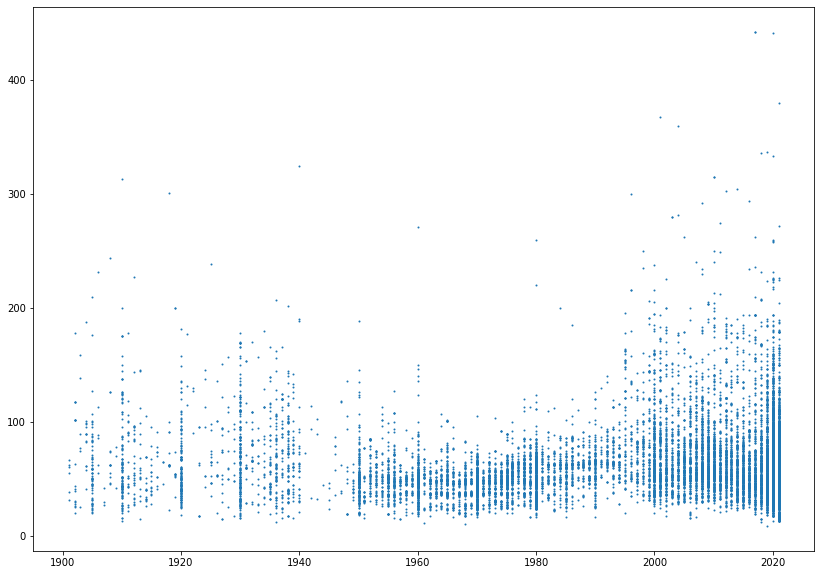

In [144]:
plt.figure(figsize=(14, 10))
plt.scatter(x_list, y_list, s=1)

plt.show()

(array([  307.,   249.,   457.,   218.,  1046.,  1569.,  1783.,   784.,
         2302., 11672.]),
 array([1901., 1913., 1925., 1937., 1949., 1961., 1973., 1985., 1997.,
        2009., 2021.]),
 <BarContainer object of 10 artists>)

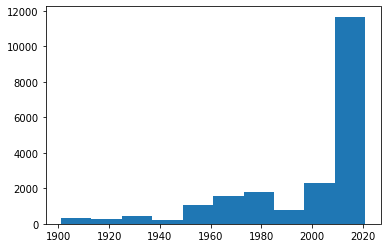

In [136]:
plt.hist(x_list)

7. Sprawdź czy istnieje zależność między rokiem budowy a numerem piętra. Narysuj odpowiedni wykres

In [147]:
y_list = df[(df['year'] > 1900) & (df['year'] < 2022) & (df['sq'] < 500)]['year']
x_list = df[(df['year'] > 1900) & (df['year'] < 2022) & (df['sq'] < 500)]['floor']

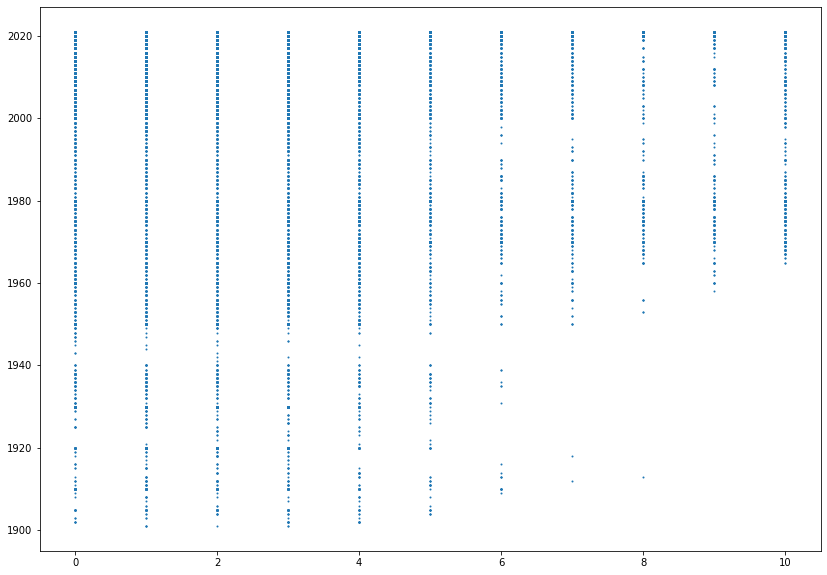

In [148]:
plt.figure(figsize=(14, 10))
plt.scatter(x_list, y_list, s=1)

plt.show()

8. Narysuj 'mapę' budynków w postaci scatterplota

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Narysuj scatterplot długości oraz szerokości geograficznej. Zwróć uwagę na odstające, niepoprawne wartości i odsiej je.
</details>


In [166]:
from mpl_toolkits.basemap import Basemap

In [209]:
x_list = df['longitude']
y_list = df['latitude']

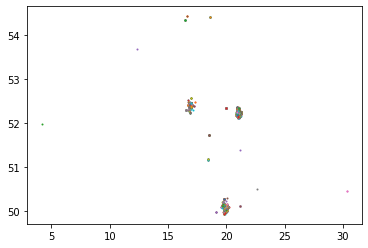

In [213]:
for x, y in zip(x_list, y_list):
    plt.plot(x, y, 'o', markersize=1)

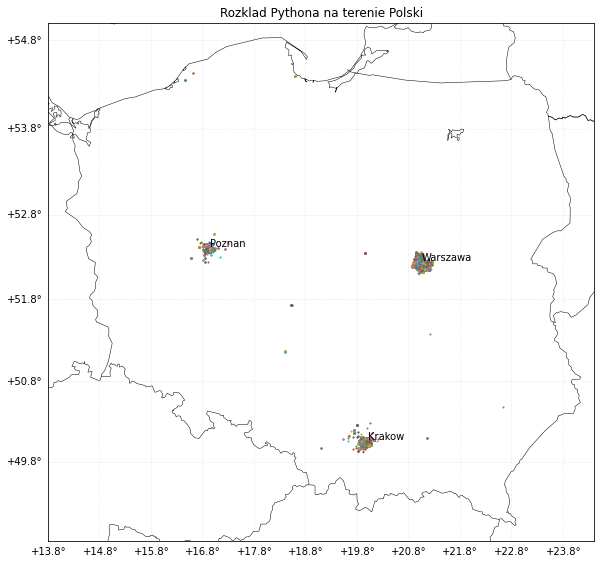

In [248]:
# miasta
miasta = {
    'Krakow': (50.06, 19.96),
    'Poznan': (52.4, 16.9),
    'Warszawa': (52.23, 21.01)
}

# dane
x_list = df['longitude']
y_list = df['latitude']

# zakres mapy (Polska)
lat_min, lat_max = 48.8, 55.0
lon_min, lon_max = 13.8, 24.4

# wymiary rysunku
fig = plt.figure(figsize=(10.0, 9.0))

# marginesy
plt.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10, wspace=0.15, hspace=0.05)

# tworzenie mapy dla Polski
m = Basemap(resolution='i', projection='merc', llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

# grubość granic i linii wybrzeży
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)

# równoleżniki i południki
m.drawparallels(np.arange(lat_min, lat_max, 1.), labels=[1,0,0,0], color='black', dashes=[1,5], labelstyle='+/-', linewidth=0.2)
m.drawmeridians(np.arange(lon_min, lon_max, 1.), labels=[0,0,0,1], color='black', dashes=[1,5], labelstyle='+/-', linewidth=0.2)

# rysowanie danych

for x, y in zip(x_list, y_list):
    x, y = m(x, y)
    m.plot(x, y, 'o', markersize=1)

for key, val in miasta.items():
    x, y = m(val[1], val[0])
    plt.text(x+5000, y+5000, key)


# tytul
plt.title("Rozklad Pythona na terenie Polski")

# i wyslanie na ekran
plt.show()

9. Policz ile średnio metrów kwadratowych przypada na pokój. Sprawdź czy zależy to od miasta

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
Utwórz nową kolumnę w której przechowasz informacje o powierzchni przypadającej na pokój. Policz średnią a następnie przeiteruj po wszystkich miastach i policz średnią wartość tylko dla tego miasta
</details>


In [225]:
df

,city,floor,latitude,longitude,price,rooms,sq,year
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,Poznań,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...
23759,Poznań,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,Warszawa,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,Poznań,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,Kraków,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


In [285]:
df['sq/rooms'] = df['sq'] / df['rooms']

In [232]:
df['sq/rooms'].mean()

32.01275666941859

In [233]:
df.groupby('city')[['sq/rooms']].mean().reset_index()

,city,sq/rooms
0,Kraków,43.434215
1,Poznań,23.638478
2,Warszawa,24.219209


10. Stwórz wykresy na których będzie można sprawdzić jak zmienia się cena za m2 w poszczególnych miastach w zależności od roku budowy. Dodaj tytuły oraz opis osi

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Stwórz kolumnę z ceną za m2
<br>
2. Stwórz 3 df-y dla każdego miasta osobny
<br>
3. Dla każdego miasta stwórz scatterplot cena za m2 vs. rok
</details>


In [286]:
df['price/sq'] = df['price'] / df['sq']

In [289]:
df

,city,floor,latitude,longitude,price,rooms,sq,year,sq/rooms,price/sq
0,Kraków,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,24.683333,10114.787306
1,Warszawa,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,24.380000,9866.611977
2,Kraków,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,18.500000,11540.540541
3,Poznań,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,33.200000,7771.084337
4,Warszawa,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,21.000000,9485.714286
...,...,...,...,...,...,...,...,...,...,...
23759,Poznań,0.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0,19.250000,7051.948052
23760,Warszawa,4.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0,23.666667,12816.901408
23761,Poznań,0.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0,16.890000,8500.000000
23762,Kraków,6.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0,19.430000,9238.291302


In [290]:
gb = df.groupby("city")
dfs = [gb.get_group(x) for x in gb.groups]

In [317]:
[*gb.groups.keys()]

['Kraków', 'Poznań', 'Warszawa']

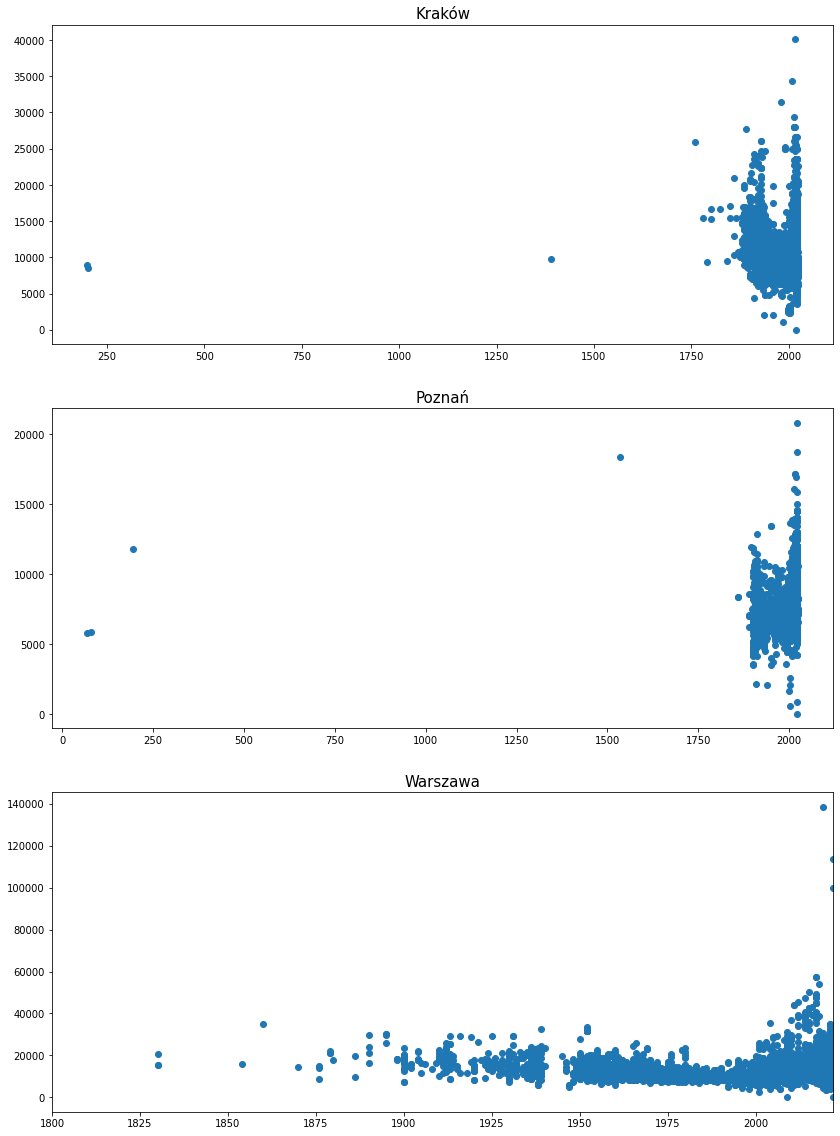

In [326]:
fig, axes = plt.subplots(figsize=(14, 20), nrows=len(dfs), ncols=1)
plt.xlim([1800, 2022])
i = 0

for df in dfs:
    axes[i].scatter(df['year'], df['price/sq'])
    axes[i].set_title([*gb.groups.keys()][i], fontsize=15)
    
    i += 1
    

11. Narysuj wykres na którym pokażesz ile budynków wybudowano w kolejnych latach. Możesz ograniczyć się do przedziału ostatnich 20 lat.

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Stwórz listę lat, które chcesz sprawdzić
<br>
2. Sprawdź ile jest mieszkań z każdego z tych lat
<br>
3. Zapisz te dwie rzeczy do list i przedstaw je na barplocie
</details>


In [3]:
df = df[(df['year'] > 2002) & (df['year'] < 2023)]

In [9]:
year_list = list(range(2002,2023))

In [4]:
gb = df.groupby('year').count()
gb

,address,city,floor,id,latitude,longitude,price,rooms,sq
year,,,,,,,,,
2003.0,141,141,141,141,141,141,141,141,141
2004.0,154,154,154,154,154,154,154,154,154
2005.0,219,219,219,219,219,219,219,219,219
2006.0,209,209,209,209,209,209,209,209,209
2007.0,205,205,205,205,205,205,205,205,205
2008.0,372,372,372,372,372,372,372,372,372
2009.0,336,336,336,336,336,336,336,336,336
2010.0,374,374,374,374,374,374,374,374,374
2011.0,212,212,212,212,212,212,212,212,212


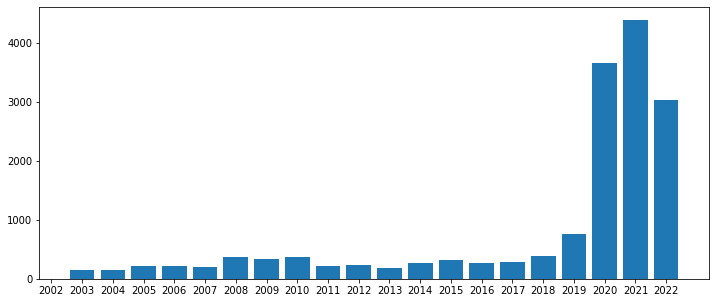

In [12]:
plt.figure(figsize = (12, 5))
plt.bar(gb.index, gb["city"])
plt.xticks(year_list)
plt.show()

12. Utwórz nową kolumnę, w której będą znajdować się dane o cenie za jeden pokój

In [13]:
df

,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
5,Nowa Huta Czyżyny ul. Woźniców,Kraków,2.0,26071.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0
6,Podgórze Płaszów Koszykarska,Kraków,0.0,22569.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0
...,...,...,...,...,...,...,...,...,...,...
23758,Nowe Miasto Rataje Wagrowska,Poznań,3.0,4516.0,52.378997,16.944244,294021.0,2.0,35.23,2022.0
23759,Stare Miasto Naramowice,Poznań,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,Włochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,Nowe Miasto Malta ul. Katowicka,Poznań,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0


In [14]:
df['price/rooms'] = df['price'] / df['rooms']

13. Policz średnią powierzchnię mieszkań na drugim piętrze w poszczególnych miastach

In [20]:
df[df['floor'] == 2].groupby('city')[['sq']].mean().reset_index()

,city,sq
0,Kraków,877.455041
1,Poznań,59.189136
2,Warszawa,62.753380


14. Stwórz wykres słupkowy, na którym pokażesz jak (i czy w ogóle) zmienia się średnia cena mieszkania wraz z piętrem

<details>
<summary style="color: #993333">Podpowiedź (kliknij)</summary>
1. Stwórz listę wszystkich unikalnych wartości kolumny floor i posortuj je
<br>
2. Stwórz pustą listę na ceny i w pętli for appenduj ją dla kolejnych wartości numeru piętra
<br>
3. Narysuj barplot
</details>


In [45]:
df = pd.read_csv("data/houses.csv")

In [46]:
gb = df.groupby('floor').mean()[['price']].reset_index()

In [47]:
gb

,floor,price
0,0.0,5.667509e+05
1,1.0,6.401415e+05
2,2.0,6.288058e+05
3,3.0,6.363465e+05
4,4.0,6.313214e+05
5,5.0,6.932407e+05
6,6.0,7.598647e+05
7,7.0,7.475659e+05
8,8.0,6.526096e+05
9,9.0,6.951317e+05


In [48]:
gb['floor']

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
Name: floor, dtype: float64

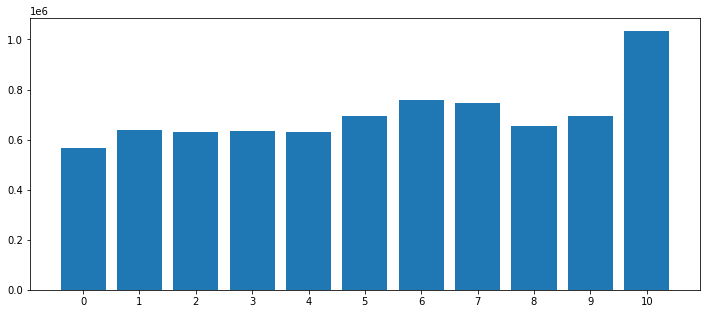

In [52]:
plt.figure(figsize = (12, 5))
plt.bar(gb['floor'], gb['price'])
plt.xticks(gb['floor'])
plt.show()